In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Path to datasets inside Google Drive
DATA_FOLDER = "/content/drive/MyDrive/indiv-datasets"

# Check contents
os.listdir(DATA_FOLDER)

['AAPL_Validation.csv',
 'AAPL_Test.csv',
 'FB_Train.csv',
 'AAPL_Train.csv',
 'MSFT_Validation.csv',
 'TSLA_Validation.csv',
 'FB_Validation.csv',
 'TSLA_Train.csv',
 'FB_Test.csv',
 'MSFT_Test.csv',
 'MSFT_Train.csv',
 'TSLA_Test.csv']

In [18]:
STOCKS = ["AAPL", "MSFT", "FB", "TSLA"]

train_dfs = []
for stock in STOCKS:
    train_path = os.path.join(DATA_FOLDER, f"{stock}_Train.csv")
    df_train = pd.read_csv(train_path)
    df_train["Stock"] = stock
    train_dfs.append(df_train)

train_df = pd.concat(train_dfs, ignore_index=True)

X_train = train_df.drop(columns=["Close", "Stock", "Date"])
y_train = train_df["Close"]

print(f"✅ Combined training set shape: {X_train.shape}")

✅ Combined training set shape: (13708, 5)


In [19]:
param_grid = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"✅ Best parameters: {grid_search.best_params_}")

✅ Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}



📊 AAPL Evaluation Metrics:
MAE  : 1.2014
MSE  : 2.9598
RMSE : 1.7204
R²   : 0.9965


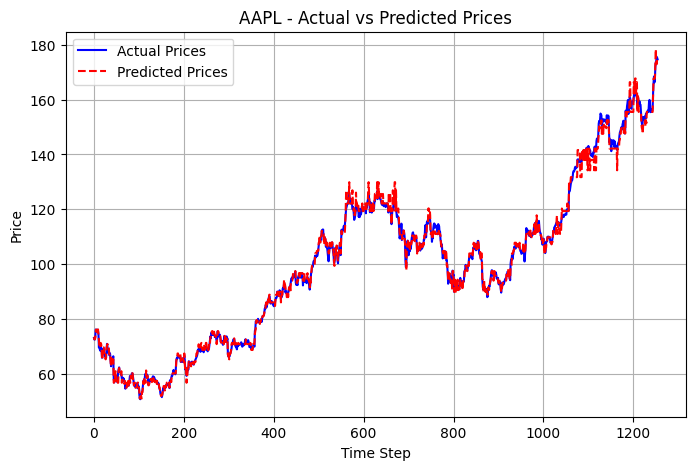


📊 MSFT Evaluation Metrics:
MAE  : 0.4322
MSE  : 0.3284
RMSE : 0.5731
R²   : 0.9983


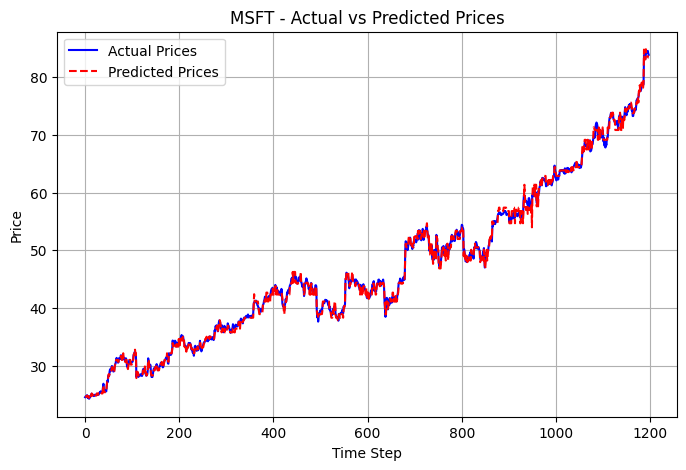


📊 FB Evaluation Metrics:
MAE  : 2.4710
MSE  : 9.9253
RMSE : 3.1505
R²   : 0.9571


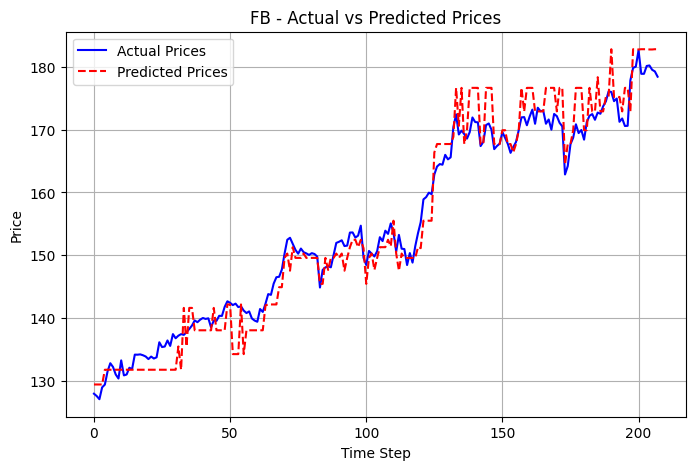


📊 TSLA Evaluation Metrics:
MAE  : 31.7985
MSE  : 2022.3418
RMSE : 44.9705
R²   : 0.4736


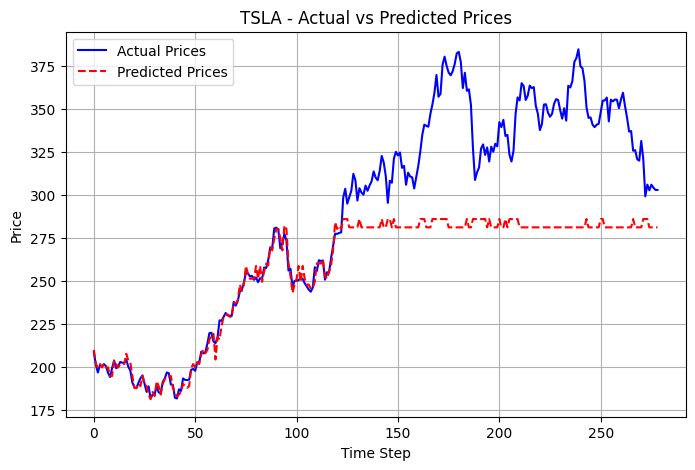

In [20]:
def evaluate_stock(stock, model):
    test_path = os.path.join(DATA_FOLDER, f"{stock}_Test.csv")
    df_test = pd.read_csv(test_path)

    X_test = df_test.drop(columns=["Close", "Stock", "Date"], errors="ignore")
    y_test = df_test["Close"]

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 {stock} Evaluation Metrics:")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label="Actual Prices", color="blue")
    plt.plot(y_pred, label="Predicted Prices", color="red", linestyle="--")
    plt.title(f"{stock} - Actual vs Predicted Prices")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

for stock in STOCKS:
    evaluate_stock(stock, best_model)